# Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

#### Create a simple forward propagation
this is for my own understanding. I will use simple numbers and check the output.   

In [23]:
# create a random vector array of 5 numbers between 0 and 1 with only 1 decimal place
inputs = np.random.rand(5).round(1)
print(inputs)

[0.4 0.2 1.  0.9 0.1]


In [24]:
# create a weight array of 2 columns and 5 rows between -0.5 and 0.5 with only 1 decimal place
weights = np.random.rand(2,5).round(1) - 0.5
print(weights)

[[-0.5 -0.1  0.1  0.4 -0.3]
 [-0.2  0.1  0.2 -0.4 -0.3]]


In [25]:
# create a bias array of 2 numbers between -0.5 and 0.5 with only 1 decimal place
bias = np.random.rand(2).round(1) - 0.5
print(bias)

[-0.4 -0.5]


In [26]:
# calculate the dot product of the inputs and weights
dot_product = np.dot(weights, inputs)
print(dot_product)

[ 0.21 -0.25]


In [27]:
# add the bias to the dot product
output = dot_product + bias
print(output)

[-0.19 -0.75]


In [28]:
# create a sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# apply the sigmoid function to the output
sig = sigmoid(output)
print(sig)

[0.45264238 0.3208213 ]


In [29]:
# create a RuLU function
def relu(x):
    return np.maximum(0, x)

# apply the RuLU function to the output
rel = relu(output)
print(rel)

[0. 0.]


In [31]:
data = pd.read_csv('data/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
data = np.array(data)
m, n = data.shape 
np.random.shuffle(data)

# Create train and test data
data_test = data[0:1000].T # 1000 samples for test
Y_test = data_test[0] # label
X_test = data_test[1:n] # data
X_test = X_test / 255. # normalize data data in the train set goes from 0 to 255. so divide by 255 to get the value between 0 and 1

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape # m_train is the number of samples in the train set

In [34]:
X_train.shape

(784, 41000)

In [35]:
Y_train.shape

(41000,)

In [43]:
print(Y_train[2],X_train[:,2])

8 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.       

In [36]:
W1 = np.random.rand(10, 784) - 0.5

In [38]:
# get the dot product between X_train and W1
Z1 = np.dot(W1, X_train[:,0])
print(Z1)

[-2.10781108  1.25791245 -4.47501616  1.12662281  1.57729744  0.68613962
  2.41360218  0.79700311  1.60541794 -0.3874295 ]


In [44]:
# run Z1 through relu function
def relu(x):
    return np.maximum(0, x)

A1 = relu(Z1)
print(A1)

[0.         1.25791245 0.         1.12662281 1.57729744 0.68613962
 2.41360218 0.79700311 1.60541794 0.        ]


In [8]:
# we need to initialize our weights and bias
# crate randon weights and bias for the first and second layer and minus 0.5 to get the value between -0.5 and 0.5
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5 
    return W1, b1, W2, b2

# ReLU activation function
def ReLU(Z):
    return np.maximum(Z, 0)

# softmax activation function
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

# forward propagation
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# one hot encoding
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max()+1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


# back progagation
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

# update weights and bias
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2
    

### Explanation:

- **Get Predictions:** The `get_predictions` function takes the output of the neural network (A2) and returns the index of the maximum value in each column, which corresponds to the predicted class.

- **Get Accuracy:** The `get_accuracy` function compares the predictions to the true labels (Y) and calculates the proportion of correct predictions. This is a common metric for evaluating classification models.

- **Gradient Descent:** The `gradient_descent` function is the main training loop. It initializes the parameters, then iteratively performs forward propagation, backpropagation, and parameter updates. The learning rate (`alpha`) controls the size of the updates, and the number of iterations determines how long the training process continues.

    - The accuracy of the model is printed every 50 iterations to monitor the progress of the training.

- **Return Values:** Finally, the trained weights and biases are returned, which can be used for making predictions on new data.

In [9]:
# get predictions
def get_predictions(A2):
    return np.argmax(A2, 0)

# get accuracy 
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


# desecent gradient
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print("iteration:", i)
            print("accuracy:", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

### Explanation:

- **Running the Model:** This line of code initiates the training process of your neural network. The `gradient_descent` function is called with the training data (`X_train`, `Y_train`), a learning rate of `0.10`, and a total of `1000` iterations.

- **Training Parameters:**
  - **Learning Rate (`0.10`):** This value controls how much the weights and biases are updated during each iteration of gradient descent. A higher learning rate can speed up the training but might lead to instability, while a lower learning rate can result in more stable but slower training.
  - **Iterations (`1000`):** This is the number of times the training loop will run. More iterations allow the model more opportunities to learn from the data, but also increase the computational cost.

- **Output:** The trained weights (`W1`, `W2`) and biases (`b1`, `b2`) are returned and stored in their respective variables. These parameters can then be used to make predictions on new data or evaluate the model's performance on a test set.

In [10]:
# run the model
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 1000)

iteration: 0
[0 0 6 ... 8 6 8] [3 7 2 ... 7 1 1]
accuracy: 0.11697560975609757
iteration: 50
[3 7 2 ... 7 1 8] [3 7 2 ... 7 1 1]
accuracy: 0.4701951219512195
iteration: 100
[3 7 2 ... 7 1 1] [3 7 2 ... 7 1 1]
accuracy: 0.6808780487804879
iteration: 150
[8 7 6 ... 7 1 1] [3 7 2 ... 7 1 1]
accuracy: 0.7080975609756097
iteration: 200
[8 7 6 ... 7 1 1] [3 7 2 ... 7 1 1]
accuracy: 0.7627073170731707
iteration: 250
[8 7 6 ... 7 1 1] [3 7 2 ... 7 1 1]
accuracy: 0.8011707317073171
iteration: 300
[3 7 6 ... 7 1 1] [3 7 2 ... 7 1 1]
accuracy: 0.8225121951219512
iteration: 350
[3 7 6 ... 7 1 1] [3 7 2 ... 7 1 1]
accuracy: 0.8368048780487805
iteration: 400
[3 7 2 ... 7 1 1] [3 7 2 ... 7 1 1]
accuracy: 0.845609756097561
iteration: 450
[3 7 2 ... 7 1 1] [3 7 2 ... 7 1 1]
accuracy: 0.8521951219512195
iteration: 500
[3 7 2 ... 7 1 1] [3 7 2 ... 7 1 1]
accuracy: 0.856390243902439
iteration: 550
[3 7 2 ... 7 1 1] [3 7 2 ... 7 1 1]
accuracy: 0.8592195121951219
iteration: 600
[3 7 2 ... 7 1 1] [3 7 2 ... 

In [11]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    
def print_hidden_layer_output(index, W1, b1, W2, b2):
    _, A1, _, _ = forward_prop(W1, b1, W2, b2, X_test[:, index, None])
    print("Hidden Layer Output for Test Sample", index, ":\n", A1)


Prediction:  [3]
Label:  3


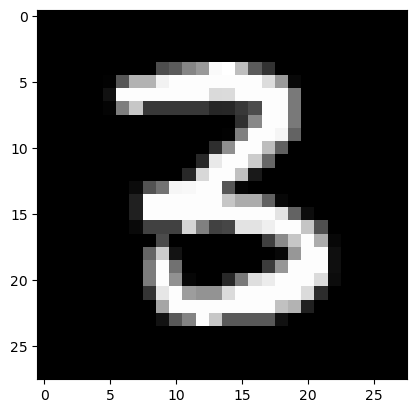

Prediction:  [7]
Label:  7


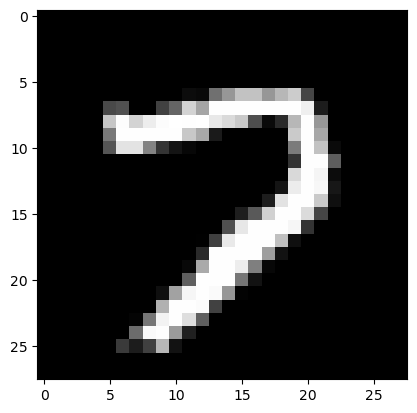

Prediction:  [2]
Label:  2


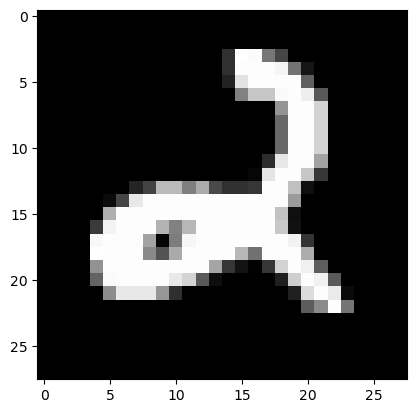

Prediction:  [1]
Label:  1


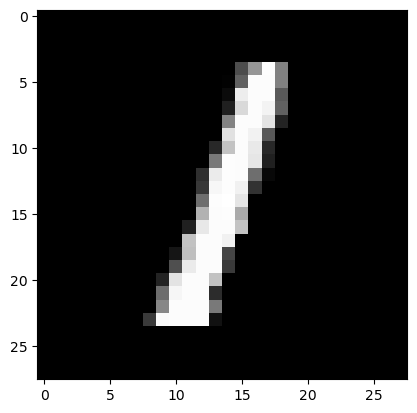

Hidden Layer Output for Test Sample 0 :
 [[ 8.53266793]
 [ 0.        ]
 [16.70316672]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [14.43922918]
 [ 0.        ]
 [ 0.        ]]
Hidden Layer Output for Test Sample 1 :
 [[2.73325253e+00]
 [7.37218338e-03]
 [1.37848704e+01]
 [3.58471100e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [4.55133353e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]]


In [12]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

print_hidden_layer_output(0, W1, b1, W2, b2)
print_hidden_layer_output(1, W1, b1, W2, b2)

In [13]:
dev_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_test)

[2 0 1 0 3 4 2 9 6 8 6 2 2 9 3 5 6 7 4 6 9 2 2 3 5 9 8 1 4 3 6 1 8 0 2 3 1
 3 2 5 2 7 3 1 7 1 2 8 1 8 4 1 5 2 9 0 7 0 3 0 1 1 9 2 4 3 9 4 8 9 0 0 0 3
 7 8 3 7 7 4 5 2 5 2 2 3 0 1 6 2 1 1 0 3 4 5 0 6 4 7 1 3 4 4 2 2 4 7 9 0 8
 6 4 2 8 6 9 3 7 6 6 0 4 0 5 6 3 5 4 8 7 0 6 0 3 3 4 6 5 2 8 7 4 7 8 9 6 0
 4 1 8 8 7 8 4 1 9 6 0 0 2 4 5 8 3 3 1 8 0 6 8 8 9 5 9 9 6 8 5 5 4 7 9 7 9
 8 6 5 1 0 5 8 0 5 4 3 0 7 9 5 5 8 0 6 6 1 7 7 4 3 1 5 3 7 8 9 3 4 1 2 0 1
 9 2 3 1 0 6 7 0 5 9 1 5 9 2 4 0 1 9 2 8 5 1 3 2 0 3 8 1 0 5 0 2 0 3 4 8 1
 4 3 2 9 6 4 8 4 9 0 0 7 7 5 1 2 5 7 9 5 2 5 7 7 6 7 3 6 4 1 2 0 0 3 2 8 4
 9 9 4 4 7 8 3 2 8 6 9 5 7 7 1 6 3 6 8 2 8 1 0 1 7 0 5 6 8 7 0 1 7 2 2 6 8
 8 0 0 3 5 6 4 8 4 9 4 9 3 7 5 9 2 8 3 6 0 7 1 3 3 7 2 8 3 2 9 9 4 4 6 4 6
 6 6 6 4 3 6 2 6 6 3 7 2 7 8 6 8 8 8 8 8 1 6 1 4 5 9 8 8 7 2 4 2 6 2 7 7 9
 0 7 6 2 9 5 6 1 5 4 7 7 7 4 5 8 8 5 7 4 0 4 9 4 8 6 8 4 0 5 5 3 5 5 3 9 8
 2 2 2 5 5 6 3 0 7 3 7 7 1 0 4 5 1 6 8 1 3 4 6 2 2 3 5 9 1 2 2 5 6 5 1 1 0
 5 5 6 6 3 1 2 5 2 8 4 9 

0.869